In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator, drange
import matplotlib.dates as mdates

In [2]:
df=pd.read_csv('df_ekfz.csv')

In [4]:
df_ekfz=df.copy()

In [5]:
df_ekfz['date'] = pd.to_datetime(df['MONAT'].astype(str), format='%Y%m')

In [6]:
df_ekfz

,Unnamed: 0,MONAT,Elektro,Hybrid,komb,date
0,0,201601,1224.0,4523.0,5747.0,2016-01-01
1,1,201602,1258.0,4576.0,5834.0,2016-02-01
2,2,201603,1279.0,4670.0,5949.0,2016-03-01
3,3,201604,1303.0,4814.0,6117.0,2016-04-01
4,4,201605,1323.0,4824.0,6147.0,2016-05-01
...,...,...,...,...,...,...
91,91,202308,32329.0,103555.0,135884.0,2023-08-01
92,92,202309,33084.0,104691.0,137775.0,2023-09-01
93,93,202310,33281.0,103657.0,136938.0,2023-10-01
94,94,202311,33552.0,103213.0,136765.0,2023-11-01


<Axes: xlabel='date', ylabel='komb'>

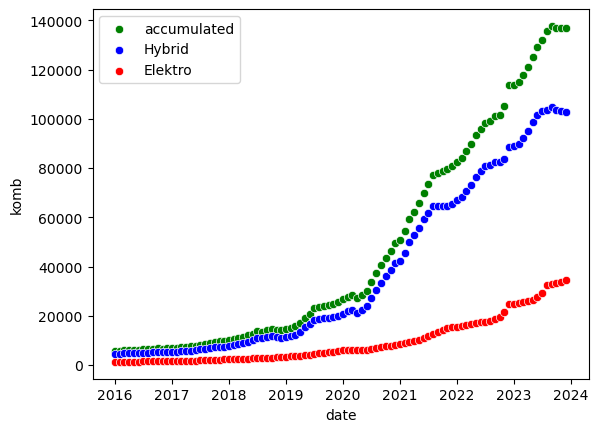

In [13]:
sns.scatterplot(df_ekfz, x='date', y='komb',color='g',label='accumulated')
sns.scatterplot(df_ekfz, x='date', y='Hybrid',color='b',label='Hybrid')
sns.scatterplot(df_ekfz, x='date', y='Elektro',color='r',label='Elektro')



In [29]:
df_ekfz.to_csv("df_ekfz.csv")

In [28]:
#df_ekfz.drop(['MONAT'], axis=1, inplace=True)


Text(0, 0.5, 'Vehicles')

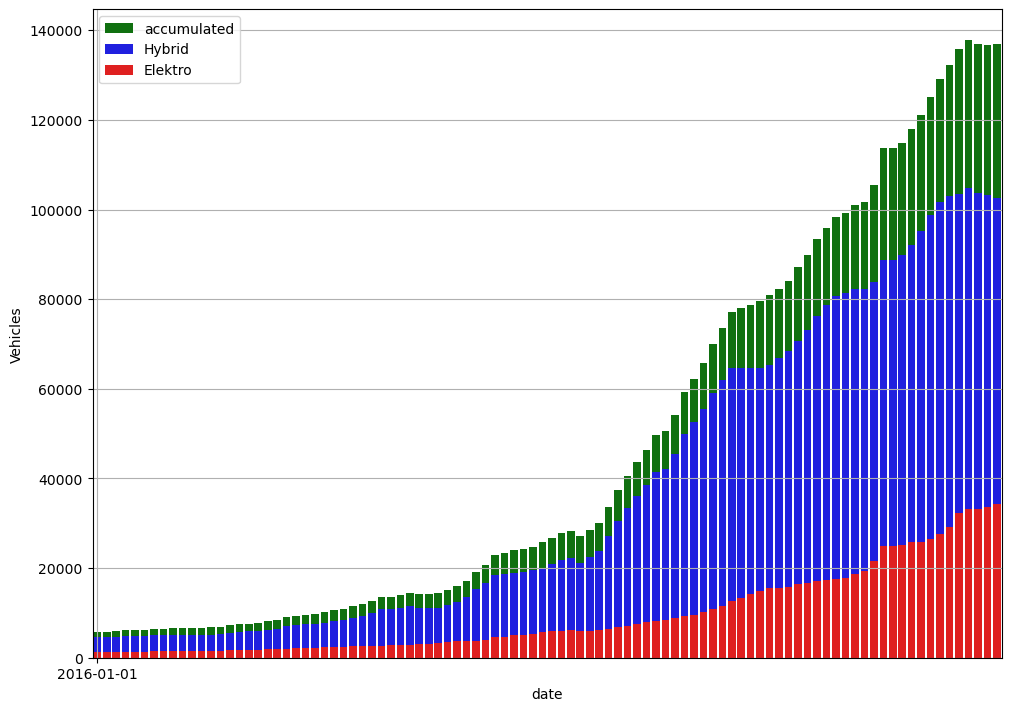

In [55]:

fig, axs = plt.subplots(1, 1, figsize=(10, 7), layout='constrained')

ax=sns.barplot(df_ekfz, x='date', y='komb',color='g',label='accumulated')
ax=sns.barplot(df_ekfz, x='date', y='Hybrid',color='b',label='Hybrid')
ax=sns.barplot(df_ekfz, x='date', y='Elektro',color='r',label='Elektro')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.grid(True)
ax.set_ylabel('Vehicles')

In [26]:
df_ekfz

,Unnamed: 0,Elektro,Hybrid,komb,date
0,0,1224.0,4523.0,5747.0,2016-01-01
1,1,1258.0,4576.0,5834.0,2016-02-01
2,2,1279.0,4670.0,5949.0,2016-03-01
3,3,1303.0,4814.0,6117.0,2016-04-01
4,4,1323.0,4824.0,6147.0,2016-05-01
...,...,...,...,...,...
91,91,32329.0,103555.0,135884.0,2023-08-01
92,92,33084.0,104691.0,137775.0,2023-09-01
93,93,33281.0,103657.0,136938.0,2023-10-01
94,94,33552.0,103213.0,136765.0,2023-11-01


KeyError: 'date'

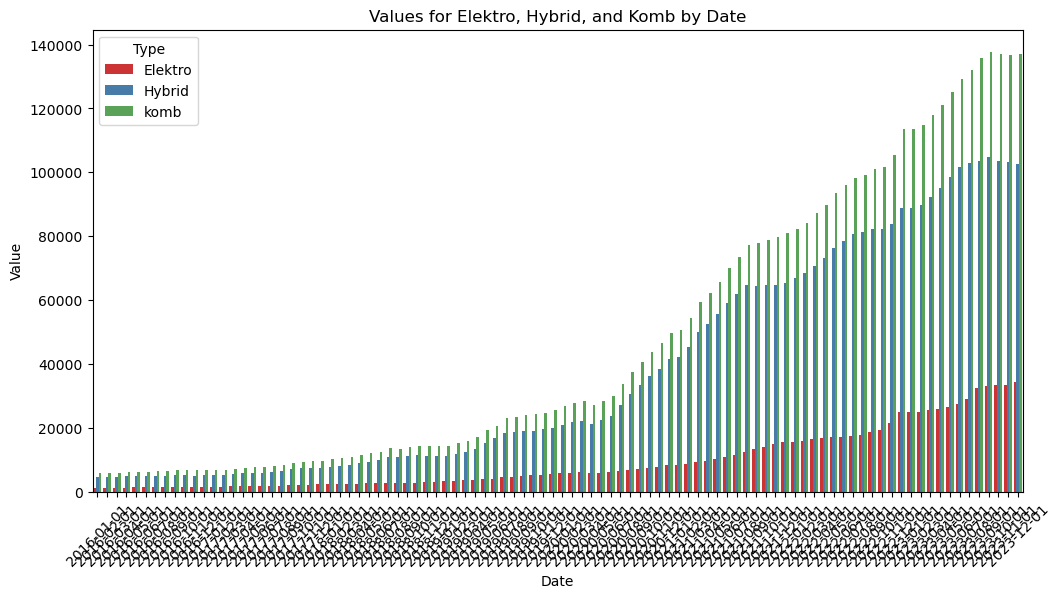